# Importing libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

from sklearn.metrics import r2_score

In [2]:
warnings.filterwarnings('ignore')

# Import DATASET

In [3]:
df = pd.read_csv("AutoData (1).csv")

In [4]:
# Viewing an overview of data

df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Basic EDA

In [5]:
# Checking the data-types of columns (checking for data-type mismatch)

df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
# Dimensions of dataset

df.shape

(205, 25)

> Since the data-set is quite small, any redundant/high class imbalanced columns must be handled smartly and not dropped

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
# Basic statiscal description of numeric columns

df.describe().round(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [9]:
# Finding the count and an overview of all the unique segments present in categorical columns

for i in df.select_dtypes('object').columns:
    print(i, '\n')
    print(df[i].nunique())
    print(df[i].unique()[:5])
    print('\n\n')

make 

147
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls']



fueltype 

2
['gas' 'diesel']



aspiration 

2
['std' 'turbo']



doornumber 

2
['two' 'four']



carbody 

5
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']



drivewheel 

3
['rwd' 'fwd' '4wd']



enginelocation 

2
['front' 'rear']



enginetype 

7
['dohc' 'ohcv' 'ohc' 'l' 'rotor']



cylindernumber 

7
['four' 'six' 'five' 'three' 'twelve']



fuelsystem 

8
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi']





# Visualization

## Uni-variant analysis

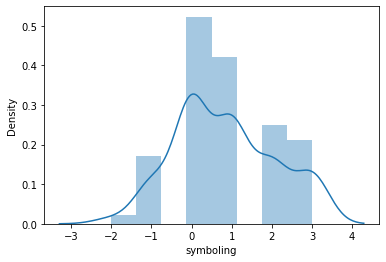

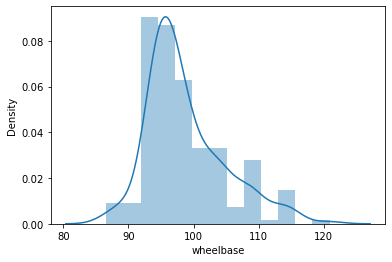

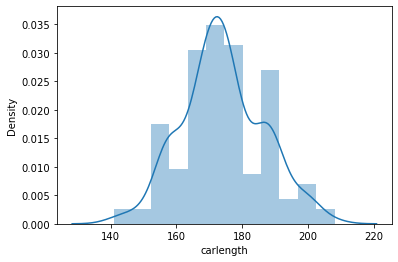

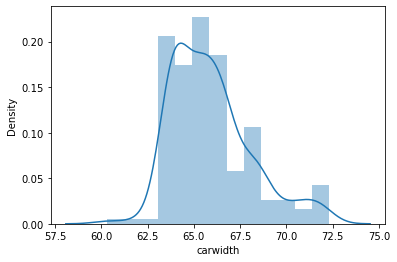

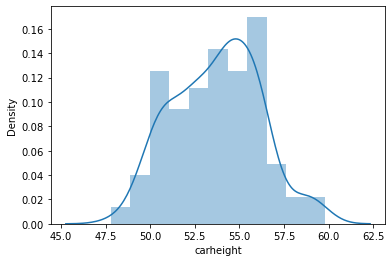

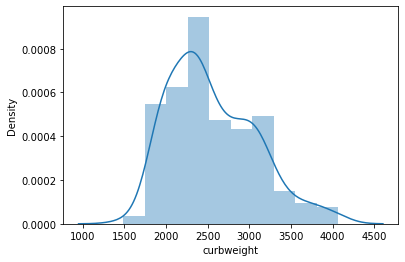

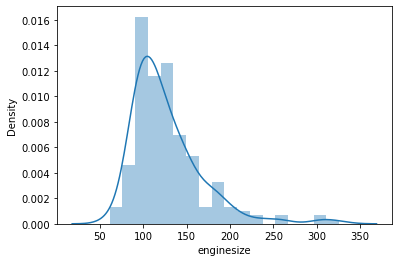

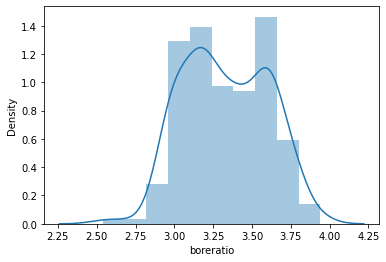

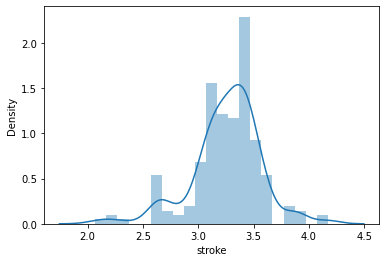

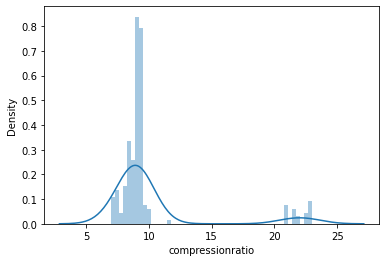

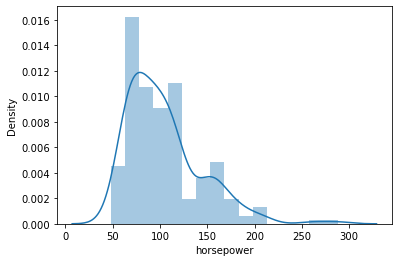

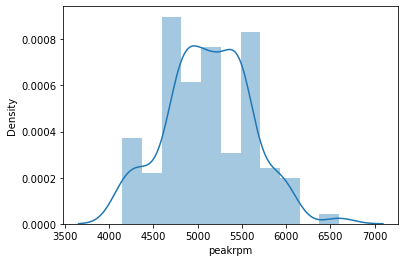

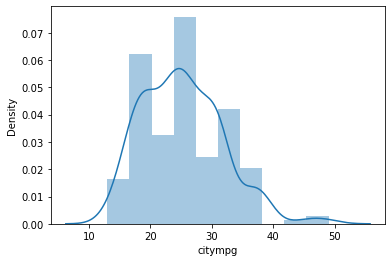

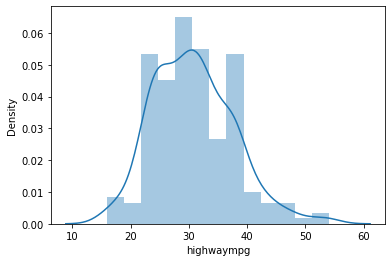

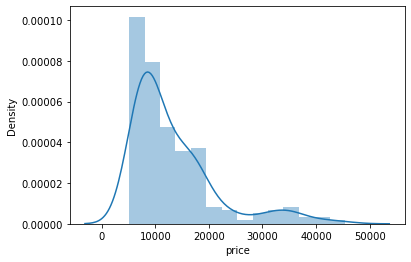

In [10]:
# Checking distribution for numeric columns

for i in df.select_dtypes('number'):
    sns.distplot(df[i])
    plt.show()

> Risk factor (symboling) in our data is quite risky as curve is higher at +ve side
>> - There are no records at -3 i.e Safest side
>> - Also, this column can be treated as a categorical one

> Bore Ratio = Bore (Diameter of cylinder)/Stroke (Length of Piston)
>> - So expect bore ratio and stroke to have high co-relation (negative), if so stroke is a redundant column and can be dropped

### Categorical Analysis

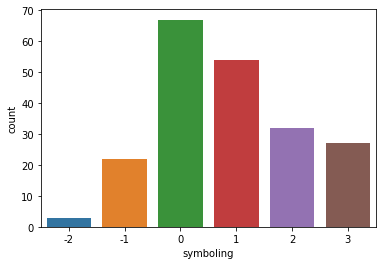

In [11]:
# Checking the share of Fuel-type

sns.countplot(x = 'symboling', data = df)
plt.show()

> Many risky cars rated vehicles are present in data

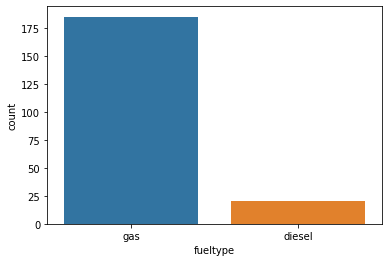

In [12]:
# Checking the share of Fuel-type

sns.countplot(x = 'fueltype', data = df)
plt.show()

> Majority of the data present is of 'gas' type, so prices will be skewed towards it, hence mean (average) can be a good measure when performing bi-variant analysis

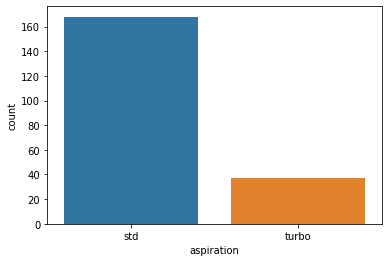

In [13]:
# Checking the share of Aspiration

sns.countplot(x = 'aspiration', data = df)
plt.show()

> There's an imbalance

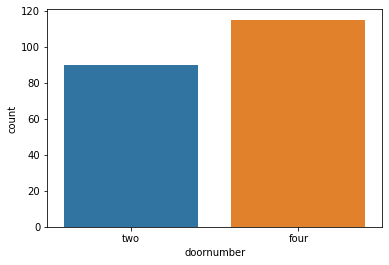

In [14]:
# Checking the share of Door-number

sns.countplot(x = 'doornumber', data = df)
plt.show()

> More 4-door vehicles are available

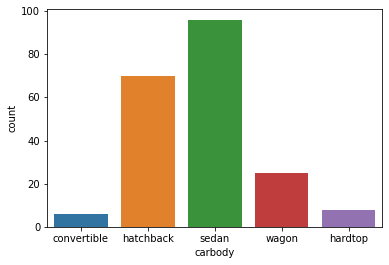

In [15]:
# Checking the share of Car-body types

sns.countplot(x = 'carbody', data = df)
plt.show()

> Since 'hardtop' and 'convertible' are <5% of the data, they can be clubbed so that the model can also taken into account this minority class but need to check if the prices tend to foloow the same pattern

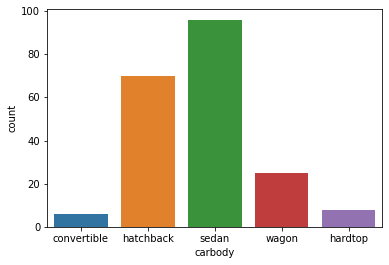

In [16]:
# Checking the share of Car body


sns.countplot(x = 'carbody', data = df)
plt.show()

In [17]:
(df['carbody'].value_counts(normalize = True) * 100).round(2)

sedan          46.83
hatchback      34.15
wagon          12.20
hardtop         3.90
convertible     2.93
Name: carbody, dtype: float64

> 'hardtop' and 'convertibles' need to be inspected for minority class pattern with the target variable

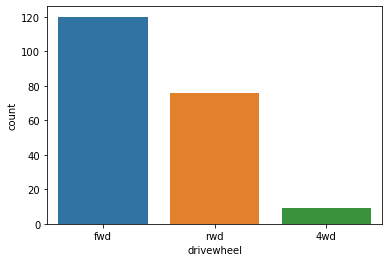

In [18]:
# Checking the distribution of Drive-wheel

sns.countplot(x = 'drivewheel', data = df, order = ['fwd', 'rwd', '4wd'])
plt.show()

> Forward Drives have more data points comparatively

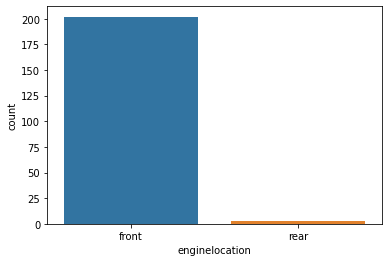

In [19]:
# Checking the share of Engine Location

sns.countplot(x = 'enginelocation', data = df)
plt.show()

In [20]:
(df['enginelocation'].value_counts(normalize = True) * 100).round(2)

front    98.54
rear      1.46
Name: enginelocation, dtype: float64

> High data imbalance, need to check for price for 'rear' type of vehicles if it's insightful then need to retain it else can be dropped

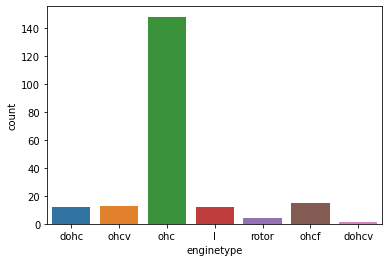

In [21]:
# Checking the share of Engine-type

sns.countplot(x = 'enginetype', data = df)
plt.show()

In [22]:
(df['enginetype'].value_counts(normalize = True) * 100).round(2)

ohc      72.20
ohcf      7.32
ohcv      6.34
dohc      5.85
l         5.85
rotor     1.95
dohcv     0.49
Name: enginetype, dtype: float64

> 'rotor' and 'dohcv' need to be inspected for minority class pattern with the target variable

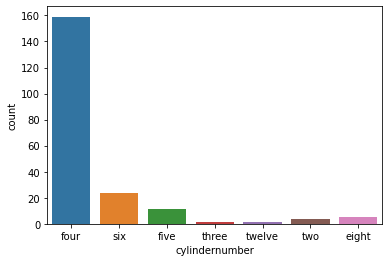

In [23]:
# Checking the share of Cylinder-number

sns.countplot(x = 'cylindernumber', data = df)
plt.show()

In [24]:
(df['cylindernumber'].value_counts(normalize = True) * 100).round(2)

four      77.56
six       11.71
five       5.37
eight      2.44
two        1.95
three      0.49
twelve     0.49
Name: cylindernumber, dtype: float64

> ' 'three', 'twelve', 'two' and 'eight' need to be inspected for minority class pattern with the target variable

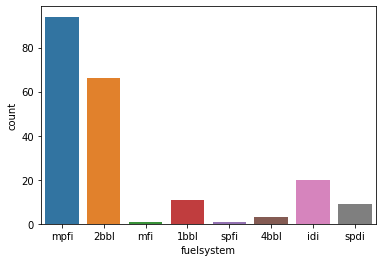

In [25]:
# Checking the share of Fuel-system

sns.countplot(x = 'fuelsystem', data = df)
plt.show()

In [26]:
(df['fuelsystem'].value_counts(normalize = True) * 100).round(2)

mpfi    45.85
2bbl    32.20
idi      9.76
1bbl     5.37
spdi     4.39
4bbl     1.46
mfi      0.49
spfi     0.49
Name: fuelsystem, dtype: float64

> 'spfi', 'mfi', '4bbl' and 'spdi' need to be inspected for minority class pattern with the target variable

# Bi-variant analysis

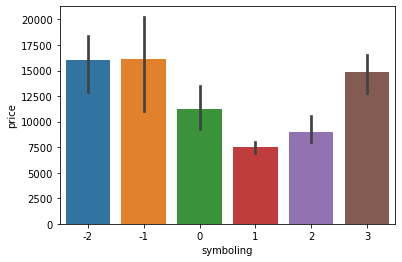

In [27]:
# Checking impact of Symboling (insurance risk factor) on median price

sns.barplot(x = df['symboling'], y = df['price'], estimator = np.median)
plt.show()

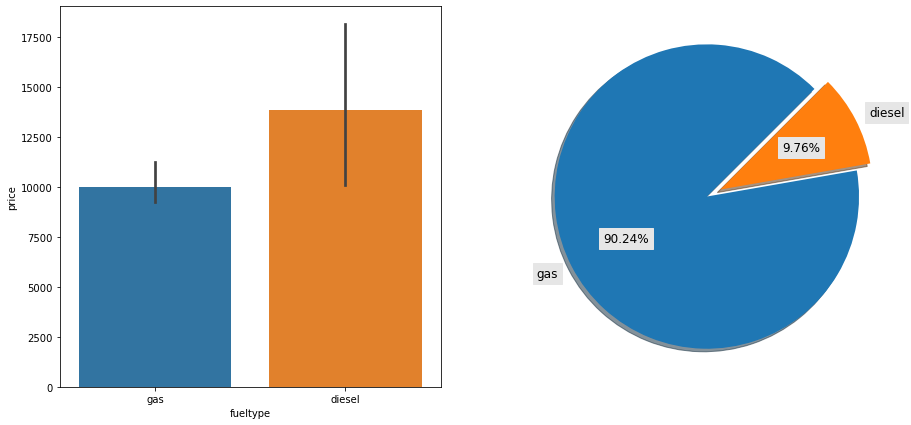

In [28]:
# Checking impact of Fuel type on median price

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.barplot(x = df['fueltype'], y = df['price'], estimator = np.median)

plt.subplot(1, 2, 2)
plt.pie(x = df['fueltype'].value_counts(), labels = df['fueltype'].value_counts().index, autopct='%1.2f%%', 
            shadow= True, explode = [0, 0.1], textprops= {'fontsize': 12, 'backgroundcolor':(0.9, 0.9, 0.9)}, 
            startangle = 45)

plt.show()

> Diesel vehicles tend to cost higher though it's count is less

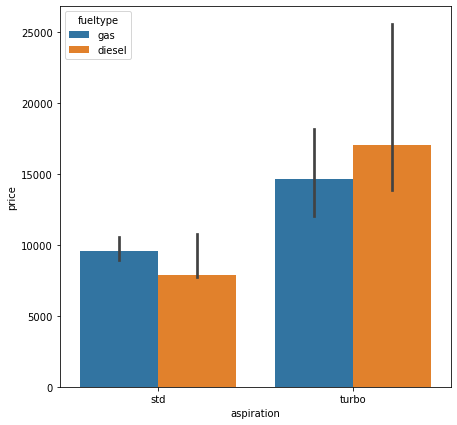

In [29]:
# Checking impact of Aspiration type on median price

plt.figure(figsize=(7, 7))

sns.barplot(x = df['aspiration'], y = df['price'], hue = df['fueltype'], estimator = np.median)

plt.show()

In [30]:
df['aspiration'].value_counts(normalize=True) * 100

std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

> The difference in price between `std` and `turbo` for aspiration types is greater relatively due to which it's aggregated price is higher
> Though the count of `std` is higher (by approx >4 times) yet it's median price is low
>>  - Perhaps because std types are quite common

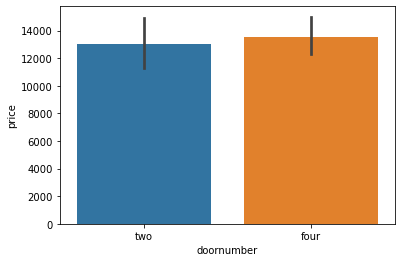

In [31]:
# Checking impact of Number of Doors on median price

sns.barplot(x = df['doornumber'], y = df['price'], estimator = np.mean)

plt.show()

The cost of both the types is approximately same

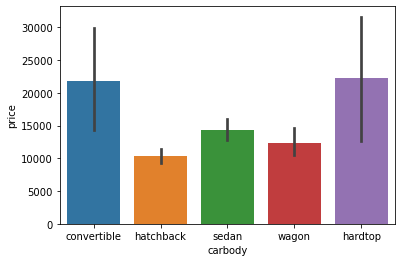

In [32]:
# Checking impact of Aspiration type on median price

sns.barplot(x = df['carbody'], y = df['price'], estimator = np.mean)

plt.show()

> Since 'hardtop' and 'hatchback' don't follow the same pattern in prices, we can't combine them into a single category on the basis of minority classes

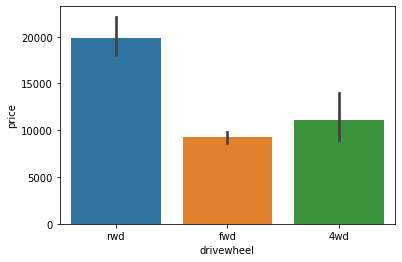

In [33]:
# Checking impact of Engine type on median price

sns.barplot(x = df['drivewheel'], y = df['price'], estimator = np.mean)

plt.show()

> Foward and 4wd tend to follow similar pricing trend <br><br>
> Rear wheel drives has higher pricing

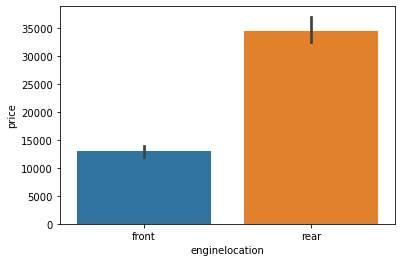

In [34]:
# Checking impact of Engine type on median price

sns.barplot(x = df['enginelocation'], y = df['price'], estimator = np.mean)

plt.show()

> Though the count of rear type is in high minority level, yet it's average pricing is greater than twice the average of front types. Hence, this variable can prove as an important/significant variable for predicting the target

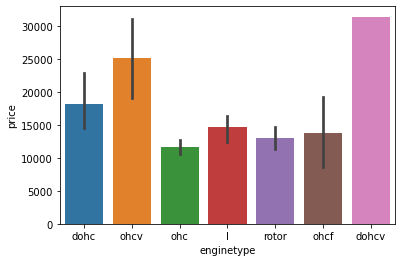

In [35]:
# Checking impact of Engine type on median price

sns.barplot(x = df['enginetype'], y = df['price'], estimator = np.mean)

plt.show()

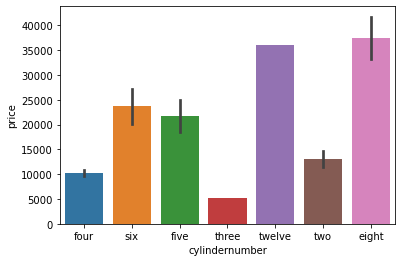

In [36]:
# Checking impact of Number of cylinder on median price

sns.barplot(x = df['cylindernumber'], y = df['price'], estimator = np.mean)

plt.show()

> Since 'three', 'twelve', 'two' and 'eight' don't follow the same pattern in prices, we can't combine them into a single category on the basis of minority classes

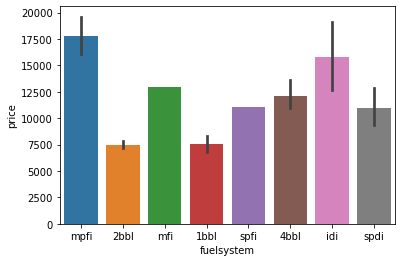

In [37]:
# Checking impact of Fuel type on median price

sns.barplot(x = df['fuelsystem'], y = df['price'], estimator = np.mean)

plt.show()

Since 'spfi', 'mfi', '4bbl' and 'spdi' follow the similar price pattern, they can be combined into a single category

In [38]:
(df['fuelsystem'].value_counts(normalize = True) * 100).round(2)

mpfi    45.85
2bbl    32.20
idi      9.76
1bbl     5.37
spdi     4.39
4bbl     1.46
mfi      0.49
spfi     0.49
Name: fuelsystem, dtype: float64

> Combining low % categories as others

In [39]:
df['fuelsystem'].replace(to_replace= ['spfi', 'mfi', '4bbl', 'spdi'], 
                         value= ['others', 'others', 'others', 'others'], inplace = True)

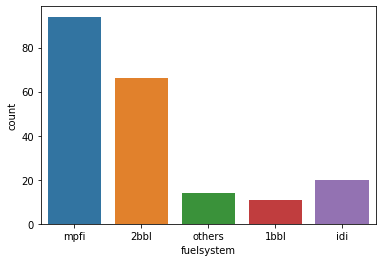

In [40]:
sns.countplot(x = 'fuelsystem', data = df)

plt.show()

In [41]:
# Since 'symboling' should be treated as a categorical type ignoring it

temp = df[df.columns[~(df.columns.isin(['symboling']))]]

In [42]:
temp.shape

(205, 24)

In [43]:
temp.columns

Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

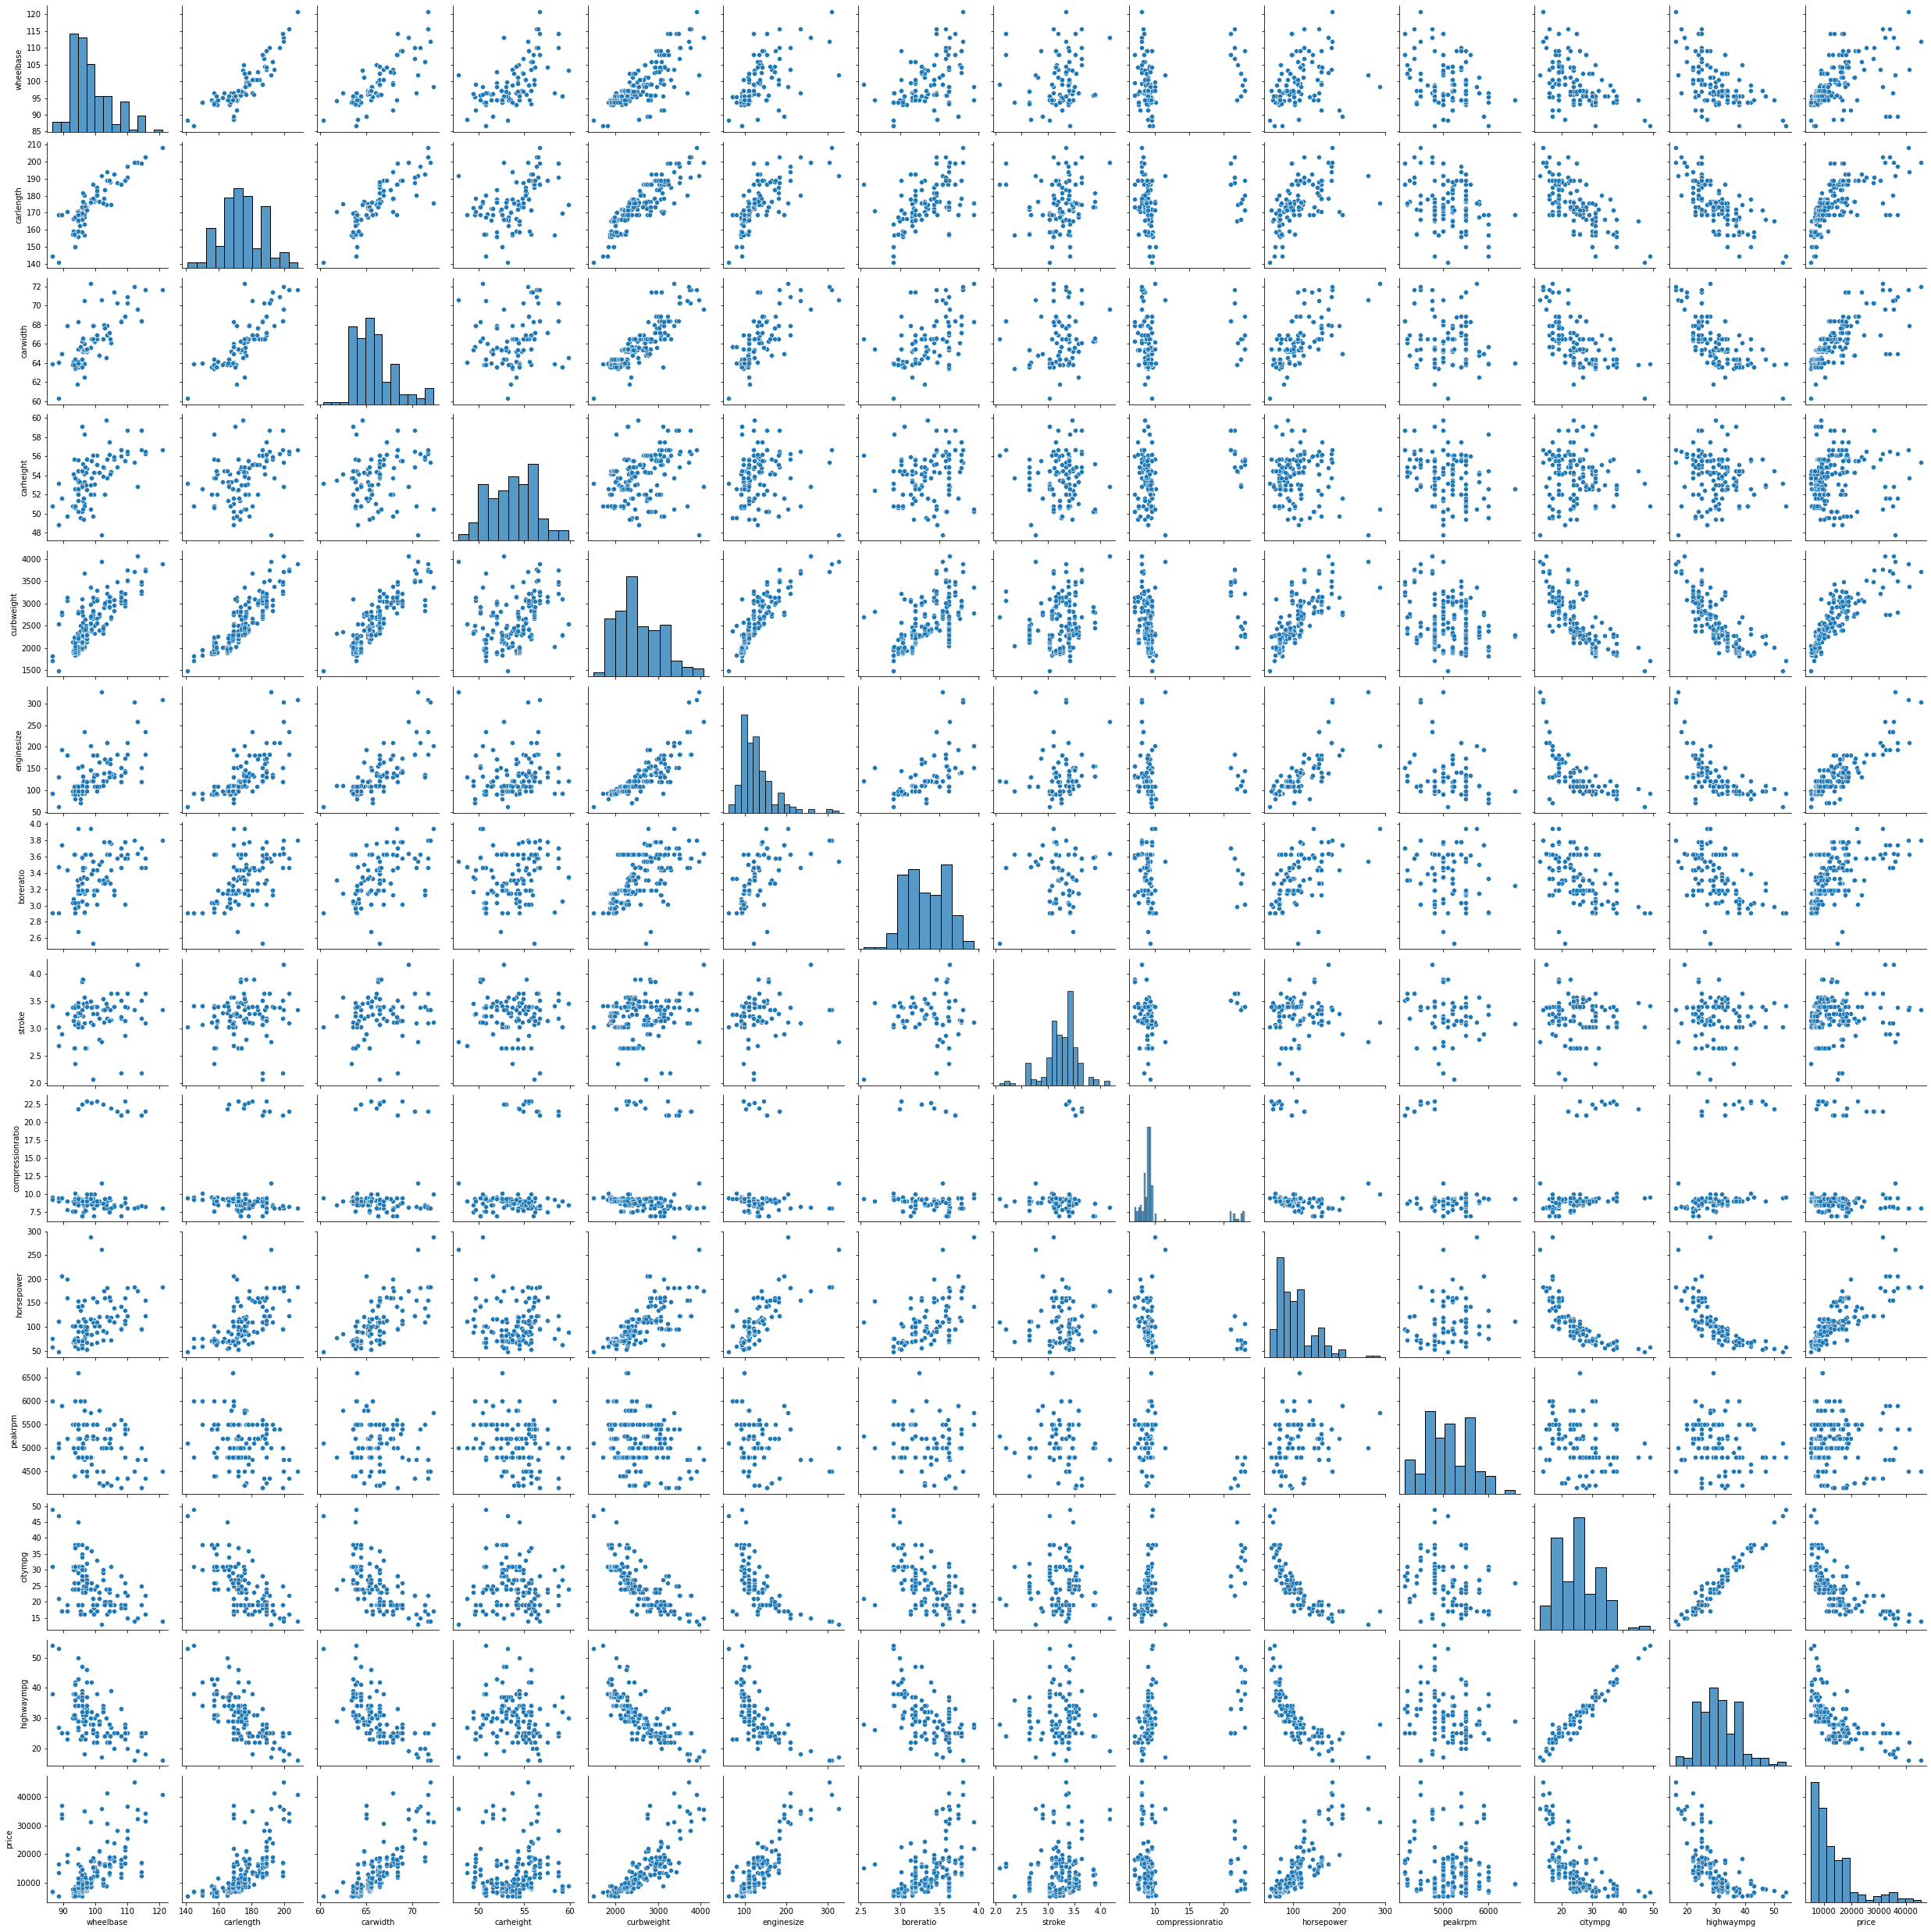

In [44]:
sns.pairplot(temp)

plt.show()

<Figure size 432x288 with 0 Axes>

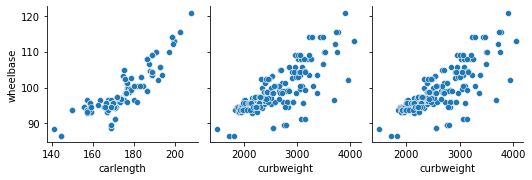

In [45]:
plt.figure()

sns.pairplot(temp, y_vars = 'wheelbase', x_vars = ['carlength', 'curbweight', 'curbweight'])

plt.show()

<Figure size 432x288 with 0 Axes>

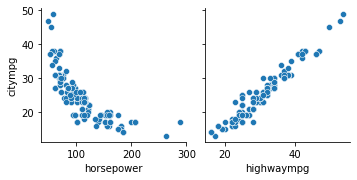

In [46]:
plt.figure()

sns.pairplot(temp, y_vars = 'citympg', x_vars = ['horsepower', 'highwaympg'])

plt.show()

> citympg has a negative co-relation with horsepower

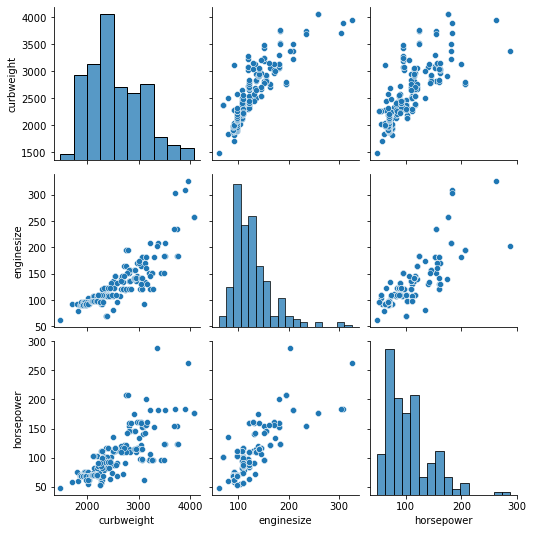

In [47]:
sns.pairplot(temp, vars = ['curbweight', 'enginesize', 'horsepower'])

plt.show()

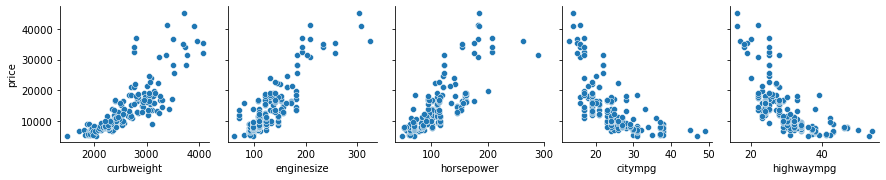

In [48]:
sns.pairplot(temp, y_vars = 'price', x_vars = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'])

plt.show()

> curbweight, enginesize and horsepower follow sort of a linear co-relation with target variable with positive co-relation and seems to follow a similar trend
>> - Need to check for co-relation and VIF

> citympg and highwaympg follow sort of a linear co-relation with target variable with negative co-relation and seems to follow a similar trend
>> - Need to check for co-relation and VIF

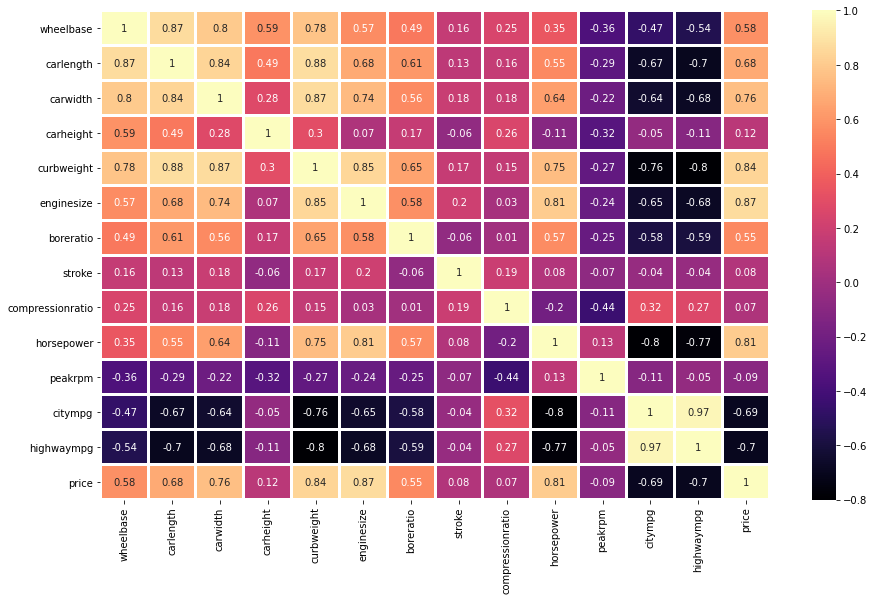

In [49]:
# Co-relation Matrix

plt.figure(figsize=(15, 9))

sns.heatmap(temp.corr().round(2), cmap = 'magma', annot = True, linewidths = 2)

plt.show()

> <i>__Wheelbase__ </i> has high positive corelation with `carlength`, `carwidth`, `horsepower` and `boreratio` this also applies with each other and fairly good positive relation with `carheight`<br><br>
> <i>__Carlength__ </i> has a mediumly positive co-relation with `enginesize` while mediumly negative with `citympg` and `highwaympg`. Applieas to each other also<br><br>
> <i>__Enginesize__ </i> has very high positive corelation with `horsepower` and `curbweight` (as expected)<br><br>
> <i>__Boreratio__ </i> has quite high negative co-relation with `citympg` and `highwaympg`<br><br>
> <i>__CityMPG and HighwayMPG__ </i> has high negative or weak positive co-relation with almost all variables
>> But very high positive co-relation with each<br><br>

> <i>__Price__ </i> has very high positive co-relation with `enginesize`, `curbweight`, `horsepower`, `carwidth`, `carlength`<br><br>
> <i>__Price__ </i> has very high negative co-relation with `highwaympg`<br><br>

# Feature Engineering

In [50]:
df['make'] = df['make'].apply(lambda x: x.split()[0])

In [51]:
df['make'].value_counts(ascending = True).index

Index(['mercury', 'toyouta', 'porcshce', 'Nissan', 'vokswagen', 'renault',
       'maxda', 'vw', 'chevrolet', 'alfa-romero', 'jaguar', 'porsche', 'isuzu',
       'saab', 'plymouth', 'audi', 'bmw', 'buick', 'dodge', 'volkswagen',
       'peugeot', 'volvo', 'subaru', 'mitsubishi', 'honda', 'mazda', 'nissan',
       'toyota'],
      dtype='object')

> There's a few categories such as porsche and porcshce, toyouta and toyota, etc
>> - Both are the same, (spelling mistake/shortforms)

In [52]:
df['make'].nunique()

28

In [53]:
df['make'].replace(to_replace = ['porcshce', 'toyouta', 'vw', 'vokswagen', 'maxda', 'alfa-romero', 'Nissan'], 
                   value = ['porsche', 'toyota', 'volkswagen', 'volkswagen', 'mazda', 'alfa-romeo', 'nissan'], inplace =True)

In [54]:
df['make'].nunique()

22

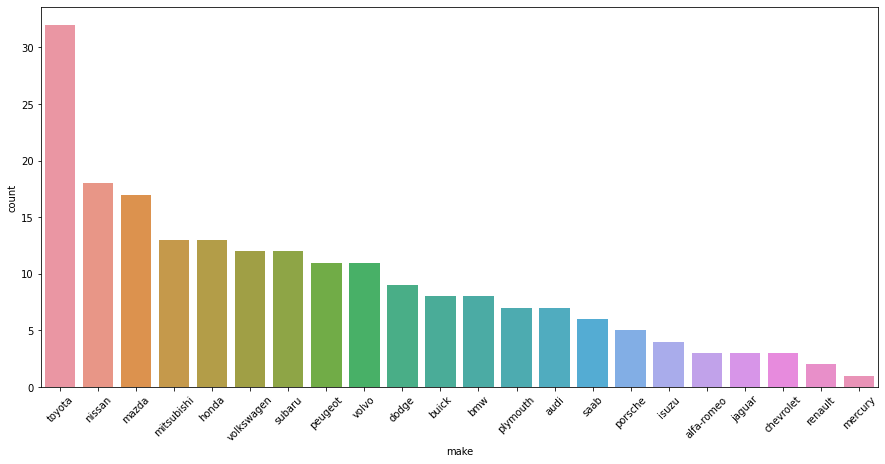

In [55]:
plt.figure(figsize = (15, 7))

sns.countplot(df['make'], order = df['make'].value_counts().index)

plt.xticks(rotation = 45)
plt.show()

> Toyota has the highest count while mercury the lowest<br><br>
> Most manufactures lie between the range 6 - 12

<AxesSubplot:ylabel='make'>

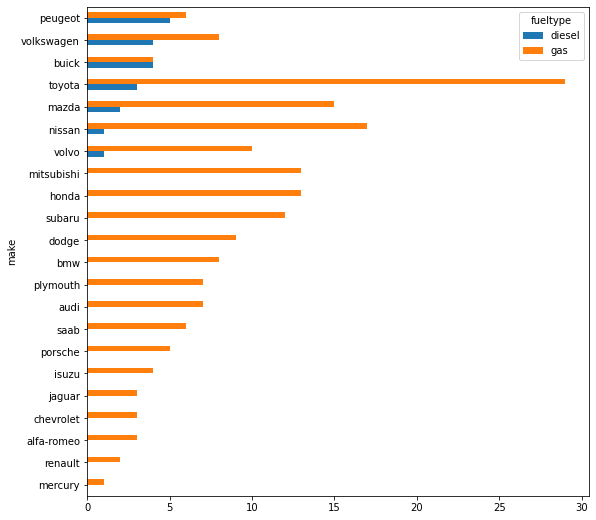

In [56]:
pd.crosstab(df['make'], df['fueltype']).sort_values(by = ['diesel', 'gas']).plot(kind = 'barh', figsize = (9, 9))

> Peugeot has almost equal number of cars in 'diesel' and 'petrol' types while also being the highest in the 'diesel' category <br><br>
> Toyota has the highest count in 'petrol' category <br><br>
> There are no diesel vehicles post volvo

<AxesSubplot:ylabel='make'>

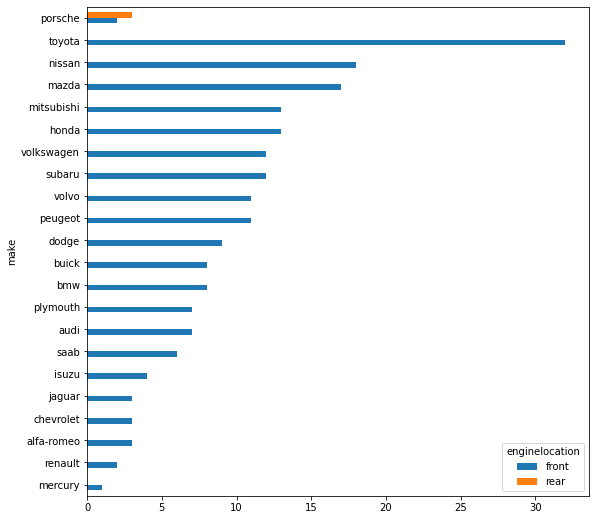

In [57]:
pd.crosstab(df['make'], df['enginelocation']).sort_values(by = ['rear', 'front']).plot(kind = 'barh', figsize = (9, 9))

> Only Porsche has 'rear' engine type of cars

## Outlier Analysis

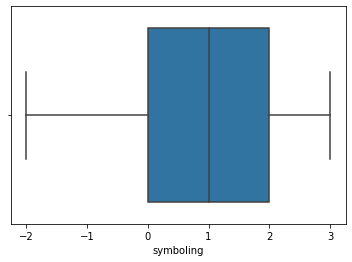

In [58]:
sns.boxplot(x = 'symboling', data = df)

plt.show()

> No outliers present

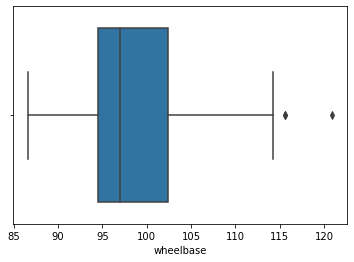

In [59]:
sns.boxplot(x = 'wheelbase', data = df)

plt.show()

> Very few outliers

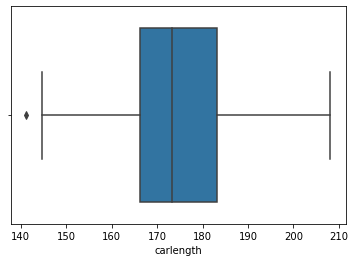

In [60]:
sns.boxplot(x = 'carlength', data = df)

plt.show()

> Very few outliers

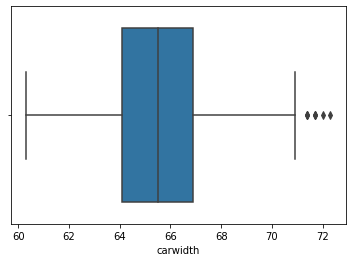

In [61]:
sns.boxplot(x = 'carwidth', data = df)

plt.show()

> Very few outliers

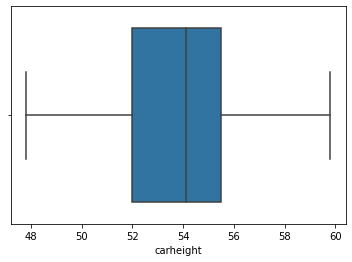

In [62]:
sns.boxplot(x = 'carheight', data = df)

plt.show()

> No outliers present

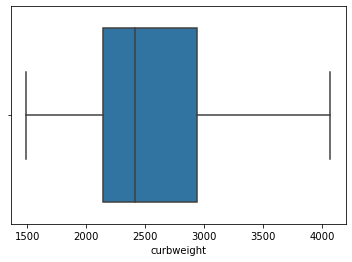

In [63]:
sns.boxplot(x = 'curbweight', data = df)

plt.show()

> No outliers present

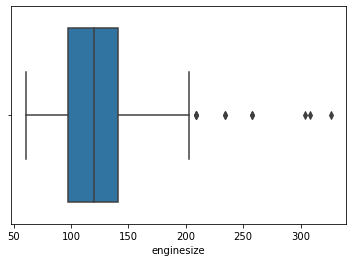

In [64]:
sns.boxplot(x = 'enginesize', data = df)

plt.show()

> Very few outliers

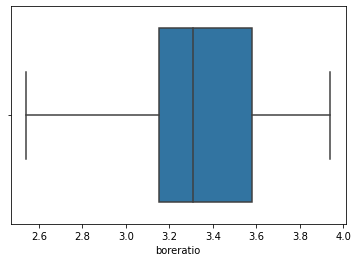

In [65]:
sns.boxplot(x = 'boreratio', data = df)

plt.show()

> No outliers present

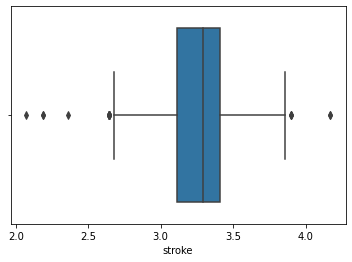

In [66]:
sns.boxplot(x = 'stroke', data = df)

plt.show()

> Few outliers present, once it's co-relation is performed against bore-ratio. We can decide what to do

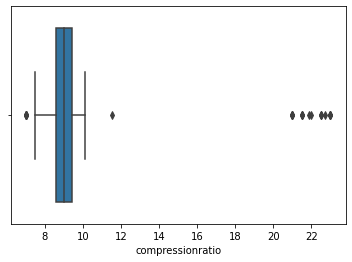

In [67]:
sns.boxplot(x = 'compressionratio', data = df)

plt.show()

> Let's explore by restricting outlier

In [68]:
temp = df[df['compressionratio'] <= np.percentile(df['compressionratio'], 0.95)]
temp.shape

(7, 25)

> If we restrict to even 95th percentile, the number of records becomes lesser the one-fourth of the original data, and hence can't be dropped<br>
> Also, since majority of the data is above 95th percentile, we can't replace it with 1.5*IQR as it'll drastically increase the biasing

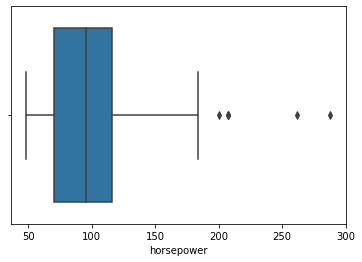

In [69]:
sns.boxplot(x = 'horsepower', data = df)

plt.show()

> Very few outliers

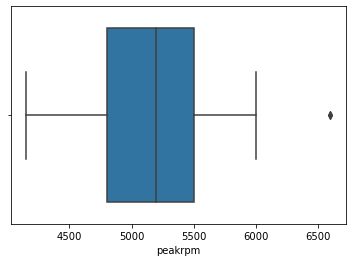

In [70]:
sns.boxplot(x = 'peakrpm', data = df)

plt.show()

> Very few outliers

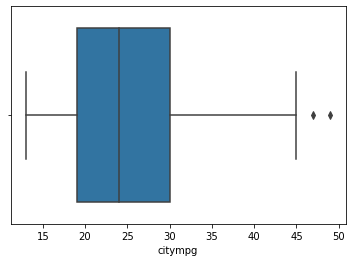

In [71]:
sns.boxplot(x = 'citympg', data = df)

plt.show()

> Very few outliers

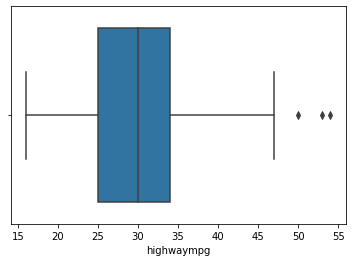

In [72]:
sns.boxplot(x = 'highwaympg', data = df)

plt.show()

> Very few outliers

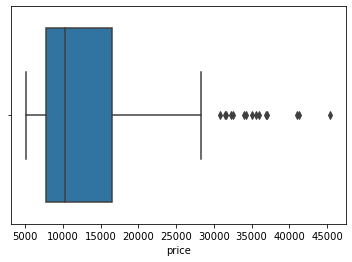

In [73]:
sns.boxplot(x = 'price', data = df)

plt.show()

> We have seen that, there's negligible outliers persent in the data apart from a very few columns

# Dummy Enconding

In [74]:
df['symboling'] = df['symboling'].astype('object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [76]:
dum_df = pd.get_dummies(df.select_dtypes('object'), drop_first=True)
dum_df.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_buick,make_chevrolet,make_dodge,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [77]:
df = pd.concat([df.loc[:, ~df.columns.isin(df.select_dtypes('object').columns)], dum_df], axis = 1)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,0,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,1,0,0,0,0,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,1,0,0,0,0,0,0,0,1,0


#  Dividing train and test data

In [78]:
# Splitting the data

train, test = train_test_split(df, test_size = 0.3, random_state = 100)

In [79]:
df.shape

(205, 66)

In [80]:
train.shape

(143, 66)

In [81]:
test.shape

(62, 66)

# Normalising the data

In [82]:
norm_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 
             'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

> ### Since most of the numerical independent variables are quite normally distributed and there are no columns where the values are strictly between 0 and 1 (except dummy variables), we can go ahead and apply standardization

In [83]:
scaler = StandardScaler()

train[norm_vars] = scaler.fit_transform(train[norm_vars])
train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others
122,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,...,0,1,0,0,0,0,1,0,0,0
125,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,1.021826,...,0,1,0,0,0,0,0,0,1,0
166,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,...,0,1,0,0,0,0,0,0,1,0
1,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,0.213410,...,0,1,0,0,0,0,0,0,1,0
199,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,1.501822,...,0,1,0,0,0,0,0,0,1,0


In [84]:
train.describe().round(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,0.06,0.74,0.13,0.01,0.01,0.03,0.35,0.09,0.44,0.06
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.24,0.44,0.34,0.08,0.08,0.17,0.48,0.29,0.50,0.24
min,-2.01,-2.57,-2.51,-2.37,-1.94,-1.57,-2.41,-3.40,-0.81,-1.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.68,-0.62,-0.86,-0.72,-0.77,-0.68,-0.93,-0.45,-0.38,-0.82,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.34,-0.11,-0.20,0.06,-0.25,-0.37,0.01,0.06,-0.28,-0.22,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.45,0.71,0.48,0.74,0.72,0.39,0.89,0.48,-0.17,0.34,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
max,2.87,2.32,2.93,2.29,2.81,4.92,2.43,2.95,3.42,4.68,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [85]:
test[norm_vars] = scaler.transform(test[norm_vars])

In [86]:
# Dividing the predictors and target variable for train dataset

y_train = train.pop('price')
X_train = train

print(y_train.shape)
print(X_train.shape)

(143,)
(143, 65)


In [87]:
# Dividing the predictors and target variable for test dataset

y_test = test.pop('price')
X_test = test
print(y_test.shape)
print(X_test.shape)

(62,)
(62, 65)


## 6. Model Building

Now, building model by using Recursive Feature Elimination (RFE), selecting top 15 variables that are significant.

In [88]:
# Running RFE with the output number of the variable equal to 6

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [89]:
# Overview of significant variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 27),
 ('carlength', False, 22),
 ('carwidth', False, 12),
 ('carheight', False, 25),
 ('curbweight', False, 18),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('stroke', False, 17),
 ('compressionratio', False, 33),
 ('horsepower', False, 41),
 ('peakrpm', False, 35),
 ('citympg', False, 48),
 ('highwaympg', False, 42),
 ('symboling_-1', True, 1),
 ('symboling_0', True, 1),
 ('symboling_1', True, 1),
 ('symboling_2', True, 1),
 ('symboling_3', True, 1),
 ('make_audi', True, 1),
 ('make_bmw', True, 1),
 ('make_buick', True, 1),
 ('make_chevrolet', False, 24),
 ('make_dodge', False, 20),
 ('make_honda', False, 23),
 ('make_isuzu', False, 45),
 ('make_jaguar', False, 26),
 ('make_mazda', False, 39),
 ('make_mercury', False, 51),
 ('make_mitsubishi', False, 11),
 ('make_nissan', False, 36),
 ('make_peugeot', False, 10),
 ('make_plymouth', False, 19),
 ('make_porsche', True, 1),
 ('make_renault', False, 49),
 ('make_saab', True, 1),
 ('make_subaru', False, 14),


## Fine Tuning Model

- #### Checking Multicollinearity among significant variables 

In [90]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,enginetype_rotor,inf
14,cylindernumber_two,inf
1,symboling_-1,1.84
0,enginesize,1.68
8,make_buick,1.65
9,make_porsche,1.65
5,symboling_3,1.54
12,enginelocation_rear,1.53
11,make_volvo,1.39
4,symboling_2,1.21


In [92]:
# Intercept addition

X_train_rfe = sm.add_constant(X_train_rfe)

In [93]:
# Training the model

lm1 = sm.OLS(y_train,X_train_rfe).fit()

In [94]:
# Viewing parameter's co-efficients and significance

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     99.29
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.42e-61
Time:                        15:23:49   Log-Likelihood:                -26.081
No. Observations:                 143   AIC:                             82.16
Df Residuals:                     128   BIC:                             126.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0705      0.295     -3.628      0.000      -1.654      -0.487
enginesize              0.7018      0.033     21.101      0.000       0.636       0.768
symboling_-1            0.7821      0.266      2.942      0.004       0.256       1.308
symboling_0             0.9325      0.298      3.125      0.002       0.342       1.523
symboling_1             0.8277      0.300      2.763      0.007       0.235       1.420
symboling_2             0.7018      0.306      2.293      0.024       0.096       1.308
symboling_3             0.8325      0.305      2.731      0.007       0.229       1.436
make_audi               0.8073      0.144      5.595      0.000       0.522       1.093
make_bmw                1.2020      0.136      8.835      0.000       0.933       1.471
make_buick              1.2273      0.182      6.745      0.000       0.867       1.587
make_porsche            1.1008      0.228      4.835      0.000       0.650       1.551
make_saab               0.6850      0.188      3.644      0.000       0.313       1.057
make_volvo              0.9755      0.200      4.874      0.000       0.579       1.372
enginelocation_rear     0.6462      0.379      1.704      0.091      -0.104       1.397
enginetype_rotor        0.5675      0.093      6.119      0.000       0.384       0.751
cylindernumber_two      0.5675      0.093      6.119      0.000       0.384       0.751
==============================================================================
Omnibus:                       16.056   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.045
Skew:                           0.544   Prob(JB):                     1.34e-06
Kurtosis:                       4.832   Cond. No.                     3.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
X_train_rfe.shape

(143, 16)

In [96]:
# Dropping 'enginetype_dohcv'

X_train_rfe.drop('enginelocation_rear', axis = 1, inplace = True)

In [97]:
X_train_rfe.shape

(143, 15)

In [98]:
# Adding constant, training model and viewing parameter's co-efficients and significance

X_train_rfe = sm.add_constant(X_train_rfe)

lm1a = sm.OLS(y_train,X_train_rfe).fit()

lm1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     105.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           5.62e-62
Time:                        15:23:49   Log-Likelihood:                -27.684
No. Observations:                 143   AIC:                             83.37
Df Residuals:                     129   BIC:                             124.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0681      0.297     -3.594      0.000      -1.656      -0.480
enginesize             0.7017      0.034     20.944      0.000       0.635       0.768
symboling_-1           0.7821      0.268      2.920      0.004       0.252       1.312
symboling_0            0.9299      0.301      3.094      0.002       0.335       1.525
symboling_1            0.8204      0.302      2.719      0.007       0.223       1.417
symboling_2            0.6998      0.308      2.269      0.025       0.090       1.310
symboling_3            0.8478      0.307      2.762      0.007       0.241       1.455
make_audi              0.8092      0.145      5.567      0.000       0.522       1.097
make_bmw               1.2030      0.137      8.777      0.000       0.932       1.474
make_buick             1.2220      0.183      6.668      0.000       0.859       1.585
make_porsche           1.3062      0.195      6.714      0.000       0.921       1.691
make_saab              0.6788      0.189      3.586      0.000       0.304       1.053
make_volvo             0.9731      0.202      4.827      0.000       0.574       1.372
enginetype_rotor       0.5586      0.093      5.988      0.000       0.374       0.743
cylindernumber_two     0.5586      0.093      5.988      0.000       0.374       0.743
==============================================================================
Omnibus:                       14.688   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.096
Skew:                           0.524   Prob(JB):                     9.66e-06
Kurtosis:                       4.667   Cond. No.                     1.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
X_train_rfe.drop('const', axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,enginetype_rotor,inf
13,cylindernumber_two,inf
1,symboling_-1,1.84
0,enginesize,1.68
8,make_buick,1.65
5,symboling_3,1.52
11,make_volvo,1.39
4,symboling_2,1.21
3,symboling_1,1.19
9,make_porsche,1.19


In [100]:
X_train_rfe.shape

(143, 14)

In [101]:
# Dropping 'cylindernumber_five'

X_train_rfe.drop('enginetype_rotor', axis = 1, inplace = True)

In [102]:
X_train_rfe.shape

(143, 13)

In [103]:
# Adding constant, training model and viewing parameter's co-efficients and significance

X_train_rfe = sm.add_constant(X_train_rfe)

lm1b = sm.OLS(y_train,X_train_rfe).fit()

lm1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     105.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           5.62e-62
Time:                        15:23:50   Log-Likelihood:                -27.684
No. Observations:                 143   AIC:                             83.37
Df Residuals:                     129   BIC:                             124.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0681      0.297     -3.594      0.000      -1.656      -0.480
enginesize             0.7017      0.034     20.944      0.000       0.635       0.768
symboling_-1           0.7821      0.268      2.920      0.004       0.252       1.312
symboling_0            0.9299      0.301      3.094      0.002       0.335       1.525
symboling_1            0.8204      0.302      2.719      0.007       0.223       1.417
symboling_2            0.6998      0.308      2.269      0.025       0.090       1.310
symboling_3            0.8478      0.307      2.762      0.007       0.241       1.455
make_audi              0.8092      0.145      5.567      0.000       0.522       1.097
make_bmw               1.2030      0.137      8.777      0.000       0.932       1.474
make_buick             1.2220      0.183      6.668      0.000       0.859       1.585
make_porsche           1.3062      0.195      6.714      0.000       0.921       1.691
make_saab              0.6788      0.189      3.586      0.000       0.304       1.053
make_volvo             0.9731      0.202      4.827      0.000       0.574       1.372
cylindernumber_two     1.1171      0.187      5.988      0.000       0.748       1.486
==============================================================================
Omnibus:                       14.688   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.096
Skew:                           0.524   Prob(JB):                     9.66e-06
Kurtosis:                       4.667   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X_train_rfe.drop('const', axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,symboling_-1,1.84
0,enginesize,1.68
8,make_buick,1.65
5,symboling_3,1.52
12,cylindernumber_two,1.46
11,make_volvo,1.39
4,symboling_2,1.21
3,symboling_1,1.19
9,make_porsche,1.19
7,make_bmw,1.18


In [105]:
X_train_rfe.shape

(143, 13)

> __model lm1g with variables `symboling_-1`, `enginesize`, `make_buick`, `symboling_3`, `cylindernumber_two`, `make_volvo`, `symboling_2`, `symboling_1`, `make_porsche`, `make_bmw`, `make_saab`, `make_audi`, `symboling_0` have VIF < 2 and all variables are significant The R squared and adjusted R squared are also almost same. This is a good model. Hence proceeding with residual analysis.__

> *** <u>Equation</u> ***:<br><br>
$x = -1.068 + \textbf{enginesize} \times 0.7017 + \textbf{symboling_-1} \times 0.7821 + \textbf{symboling_0} \times 0.9299 + \textbf{symboling_1} \times 0.8204 + \textbf{symboling_2} \times 0.6998 + \textbf{symboling_3} \times 0.8478 + \textbf{make_audi} \times 0.8092 + \textbf{make_bmw} \times 1.203 + \textbf{make_buick} \times 1.222 + \textbf{make_porsche} \times 1.3062 + \textbf{make_saab} \times 0.6788 + \textbf{make_volvo} \times 0.9731 + \textbf{cylindernumber_two} \times 1.1171$

In [106]:
# Viewing Predictor's co-efficients

lm1b.params

const                -1.068057
enginesize            0.701693
symboling_-1          0.782086
symboling_0           0.929943
symboling_1           0.820362
symboling_2           0.699815
symboling_3           0.847760
make_audi             0.809185
make_bmw              1.202960
make_buick            1.221990
make_porsche          1.306203
make_saab             0.678774
make_volvo            0.973115
cylindernumber_two    1.117143
dtype: float64

# a. Residual Analysis - Train Data

In [107]:
# Predicting using train data

X_train_rfe = sm.add_constant(X_train_rfe)

y_train_pred = lm1b.predict(X_train_rfe)

In [108]:
# Residual calculation

residuals = y_train - y_train_pred

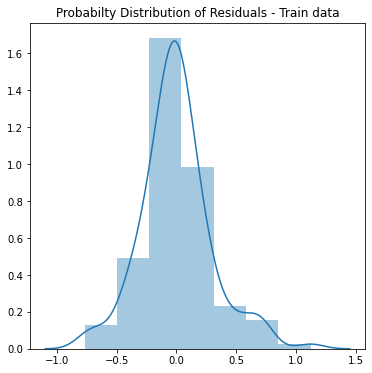

In [109]:
plt.figure(figsize = [6,6])

sns.distplot(residuals, bins = 7)

plt.title('Probabilty Distribution of Residuals - Train data')
plt.ylabel('')

plt.show()

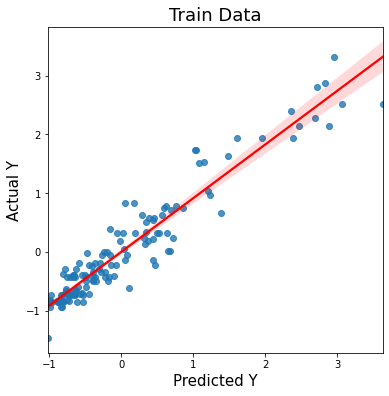

In [110]:
# Checking residual are randomly distributed (no pattern)

plt.figure(figsize = [6,6])

sns.regplot(y_train, y_train_pred, line_kws = {'color': 'r'})

plt.title('Train Data', fontsize = 18)
plt.xlabel('Predicted Y', fontsize = 15)
plt.ylabel('Actual Y', fontsize = 15)

plt.show()

> __From the above plots we can infer that the error terms are normally distributed about the mean ~0 and the predicted and actual values have a almost linear relation hence the model is a good fit and predicts data well.__

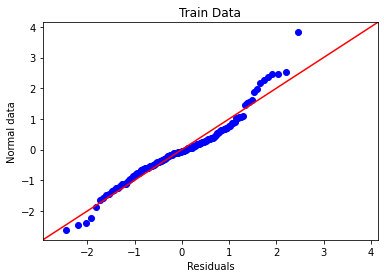

In [111]:
# Checking for residual normality using Q-Q plot on test data

sm.qqplot(residuals, fit = True, line = '45')

plt.title('Train Data')
plt.xlabel('Residuals')
plt.ylabel('Normal data')

plt.show()

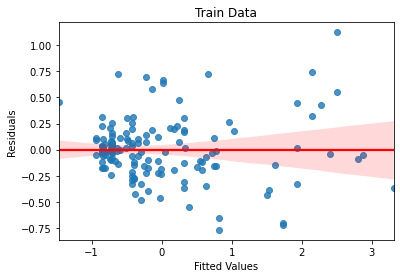

In [112]:
# Checking for homoscedasticity on test data

sns.regplot(y_train_pred, residuals, line_kws = {'color': 'r'})

plt.title('Train Data')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()

# Evaluation on Test data

In [113]:
# Columns required for model prediction

req_cols = vif['Features']

In [114]:
# Constant addition and Predicting

X_test=sm.add_constant(X_test[req_cols])
y_test_pred=lm1b.predict(X_test)

# b. Residual Analysis - Test Data

In [115]:
residuals = y_test - y_test_pred

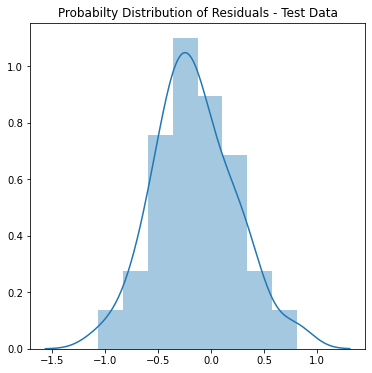

In [116]:
# Checking if Residuals are normally distributed

plt.figure(figsize = [6,6])

sns.distplot(residuals)

plt.title('Probabilty Distribution of Residuals - Test Data')
plt.ylabel('')

plt.show()

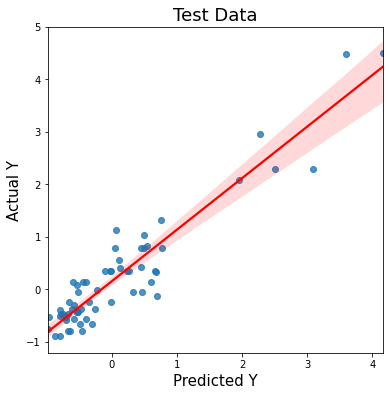

In [117]:
# Checking residual are randomly distributed (no pattern)

plt.figure(figsize = [6,6])

sns.regplot(y_test, y_test_pred, line_kws = {'color': 'r'})

plt.title('Test Data', fontsize = 18)
plt.xlabel('Predicted Y', fontsize = 15)
plt.ylabel('Actual Y', fontsize = 15)

plt.show()

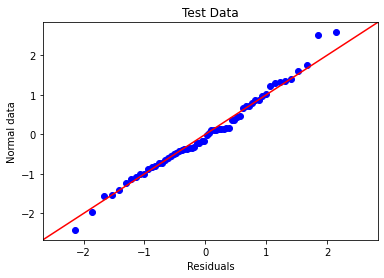

In [118]:
# Checking for residual normality using Q-Q plot on test data

sm.qqplot(residuals, fit = True, line = '45')

plt.title('Test Data')
plt.xlabel('Residuals')
plt.ylabel('Normal data')

plt.show()

# Comparing R<sup>2</sup> and Adjusted R<sup>2</sup> between Train and Test data
Testing for over-fitting

In [119]:
# R2 - train dataset

print(r2_score(y_train, y_train_pred).round(4) * 100, '%')

91.38 %


In [120]:
# R2 - test dataset

print(r2_score(y_test, y_test_pred).round(4) * 100, '%')

85.65 %


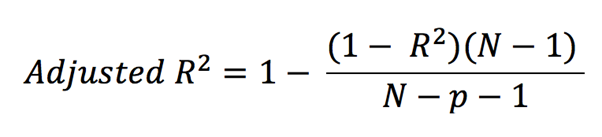

In [121]:
# Adjusted R2 - train dataset

print((1 - ((1-r2_score(y_train, y_train_pred))*(X_train_rfe.shape[0])/(X_train_rfe.shape[0] - \
                                                                        X_train_rfe.shape[1] - 1))).round(4) * 100, '%')

90.36999999999999 %


In [122]:
# Adjusted R2 - test dataset

print((1 - ((1-r2_score(y_train, y_train_pred))*(X_test.shape[0])/(X_test.shape[0] - \
                                                                        X_test.shape[1] - 1))).round(4) * 100, '%')

88.62 %


| Measurement | Train Dataset | Test Dataset |
| --- | --- | --- |
| R<sup>2</sup> | 91.57 % | 85.65 % |
| Adjusted R<sup>2</sup> | 90.37 % | 88.62 % |

> __As seen above the model does a little better on generalisation on the train data.__